## 부스팅(Boosting)

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [7]:
import pandas as pd
df = pd.DataFrame(wine.data, columns = wine.feature_names)
print(df.shape)
df.head(3)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [8]:
import numpy as np
np.unique(wine.target, return_counts = True)

(array([0, 1, 2]), array([59, 71, 48]))

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify = wine.target, random_state = 2022, test_size = 0.2
)

### 1. XGBoost(eXtra Gradient Boost)
- PC에서 설치
<pre>
conda activate base
conda install -c anaconda py-xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1018)
xgb.get_params()

In [22]:
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_xgb)

0.9722222222222222

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


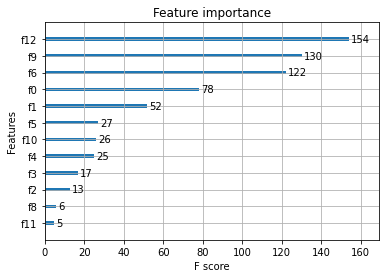

In [30]:
plot_importance(xgb)
plt.show()

- GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth":[3,4,5,6]}
grid_xgb = GridSearchCV(xgb, params, scoring = "accuracy", cv = 5 )
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 4}

In [32]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9722222222222222

### 2. LightGBM
- PC에 설치
<pre>
conda activate base
conda install -c conda-forge lightgbm
</pre>

In [33]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set = evals, eval_metric = "logloss", verbose = True)

In [38]:
pred_lgb = lgb.predict(X_test)
accuracy_score(y_test, pred_lgb)

0.9444444444444444

- 시각화

In [39]:
from lightgbm import plot_metric, plot_importance, plot_tree

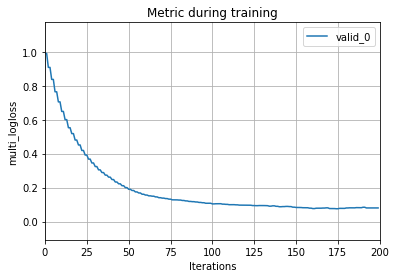

In [42]:
plot_metric(lgb);

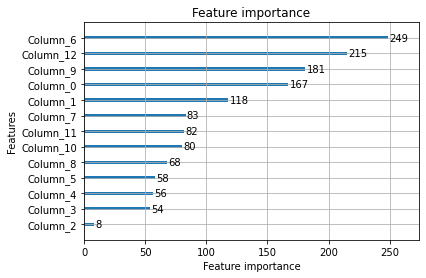

In [44]:
plot_importance(lgb);

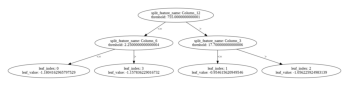

<Figure size 360x360 with 0 Axes>

In [47]:
plot_tree(lgb)
plt.figure(figsize = (5, 5))
plt.show()

In [ ]:
fig, ax = plt.subplot()

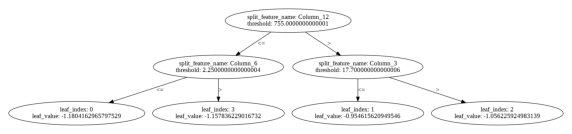

In [52]:
plot_tree(lgb, figsize=(10,20));